In [1]:
#Importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
import nltk
import string
from sklearn import svm  
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from wordcloud import WordCloud, STOPWORDS


In [2]:
#Lecture de du dataset et dans ce tp nous allons utiliser celui de l'analyse des sentiments 
dataset = pd.read_csv("data.csv",encoding= "ISO-8859-1")
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
#Reponse à la question numéro1 du TP
dataset['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##PRETRAITEMENT ET SUITE DES REPONSES AUX QUESTIONS POSEES

In [4]:
#Convertir tout ce qui n'est pas a-z, A-Z, 0-9 en espace et supprimer le lien des tweets
#Cette pratique est relative à la question numéro 2 du TP 
dataset['clean_tweet'] = dataset['OriginalTweet'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x))
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COV...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know it s getting tough when KameronWild...
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...


In [5]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COV...


In [6]:
selected =  dataset.loc[:, ["OriginalTweet", "clean_tweet"]]
selected

,OriginalTweet,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,MeNyrbie Phil Gahan Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the COV...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know it s getting tough when KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


<AxesSubplot:>

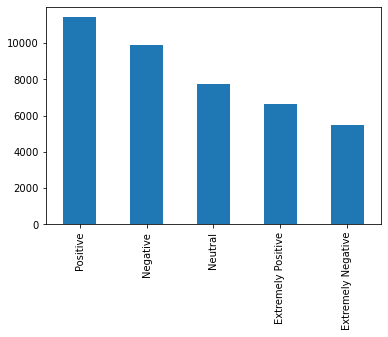

In [7]:
dataset.Sentiment.value_counts().plot(kind='bar')

In [8]:
!pip install wordcloud

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
!pip install nltk
!python -m nltk.downloader stopwords

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to C:\Users\Preferé
[nltk_data]     Briges\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
!pip install spacy
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [12]:
dataset['clean_tweet'].isnull().sum()

0

In [13]:
dataset['document_length'] = dataset['clean_tweet'].apply(lambda tokens: len(tokens))
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,document_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,45
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,109
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,284
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COV...,288
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,80
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,138
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know it s getting tough when KameronWild...,136
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,111


In [14]:
dataset['document_leght'].head()

KeyError: 'document_leght'

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
import nltk 
import nltk.corpus
import numpy as np
from nltk.text import Text

freq = nltk.FreqDist(np.hstack(dataset['clean_tweet']))
freq

In [ ]:
print(dataset.shape)

In [ ]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
dataset

In [ ]:
dataset.head(6)

In [ ]:
#Suppression de @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# Enlevons les mots courts
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
dataset

In [ ]:
#Tokenisation
# créer la nouvelle variable des tweet tokenisés
tokenized_tweet = dataset['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet

In [ ]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

# Appliquer le stemmer pour tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
# créer un texte à partir de tous les tweets
all_words = ' '.join([text for text in dataset['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Extraire les caractéristiques des tweets nettoyés
new_dataset = dataset[['clean_tweet','Sentiment']]
new_dataset

In [ ]:
dataset['Sentiment'].value_counts()

In [ ]:
#Retrait des stopword
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

In [ ]:
new_dataset['clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
new_dataset.head(6)

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_dataset,test_size = 0.3,random_state=0,stratify = new_dataset.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", valid.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweet.values)
X_test = vectorizer.transform(valid.clean_tweet.values)

y_train = train.Sentiment.values
y_test = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

In [ ]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 
              'Random Forest'],
    'Test accuracy': [NB_accuracy, logreg_accuracy, 
              rf_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

#### Le meilleur modele  
Cette partie est la reponse à la question 5 nous avons constaté que parmi les trois algorithmes utilisés; la regression logistique a la meilleure Précision; soit 61%


In [ ]:
#Classe à Prédire
CLASSES_LIST = np.unique(dataset['Sentiment'])
n_out = len(CLASSES_LIST)

print(CLASSES_LIST, n_out)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_test), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classses')
plt.xlabel('Classes prédites')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("plages d'axes par défaut")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("axes serrés")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("gamme d'axes personnalisés");

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");